## Understanding delta T in signal datasets

In [2]:
ana_label = "dev_signal_mix2BB_onspill-LH_aw_noCRV"

## Preamble

In [7]:
# External packages
import sys
import warnings
import awkward as ak

# pyutils classes
from pyutils.pylogger import Logger
from pyutils.pyprint import Print
from pyutils.pyplot import Plot

# internal packages
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load


## Load data

In [8]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/dev_signal_mix2BB_onspill-LH_aw_noCRV


In [9]:
results = loader.load_pkl()

[Load] ✅ Successfully loaded results from ../../output/results/dev_signal_mix2BB_onspill-LH_aw_noCRV/results.pkl


## Get event array

In [12]:
events = results["events"]
events.type.show()

579346 * {
    evt: {
        run: int32,
        subrun: int32,
        event: int32
    },
    crv: {
        "crvcoincs.time": var * float32,
        "crvcoincs.timeStart": var * float32,
        "crvcoincs.timeEnd": var * float32,
        "crvcoincs.nHits": var * int32,
        "crvcoincs.pos.fCoordinates.fZ": var * float32
    },
    dev: {
        at_trk_front: var * var * bool,
        has_trk_front: var * bool,
        at_trk_mid: var * var * bool,
        has_trk_mid: var * bool,
        is_reco_electron: var * bool,
        one_reco_electron: var * bool,
        one_reco_electron_per_event: bool,
        is_downstream: var * bool,
        all_downstream: var * bool,
        all_downstream_per_event: bool,
        has_trk_parent_electron: var * ?bool,
        good_trkqual: var * bool,
        within_t0: var * bool,
        within_t0err: var * bool,
        has_hits: var * bool,
        within_d0: var * bool,
        pitch_angle: var * var * float64,
        within_pitch_angle_

In [15]:
printer = Print()
printer.print_n_events(events["dev"], n_events=1)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_front: [True, True, True, True]
at_trk_mid: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_mid: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
all_downstream: [False, False, False, False]
all_downstream_per_event: False
has_trk_parent_electron: [True, True, True, True]
good_trkqual: [True, False, False, False]
within_t0: [True, True, True, True]
within_t0err: [True, False, True, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.587, 0.58, 0.299, 0.3, 0.164, ..., 0.0451, 0.165, 0

## Plot delta T distributions

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


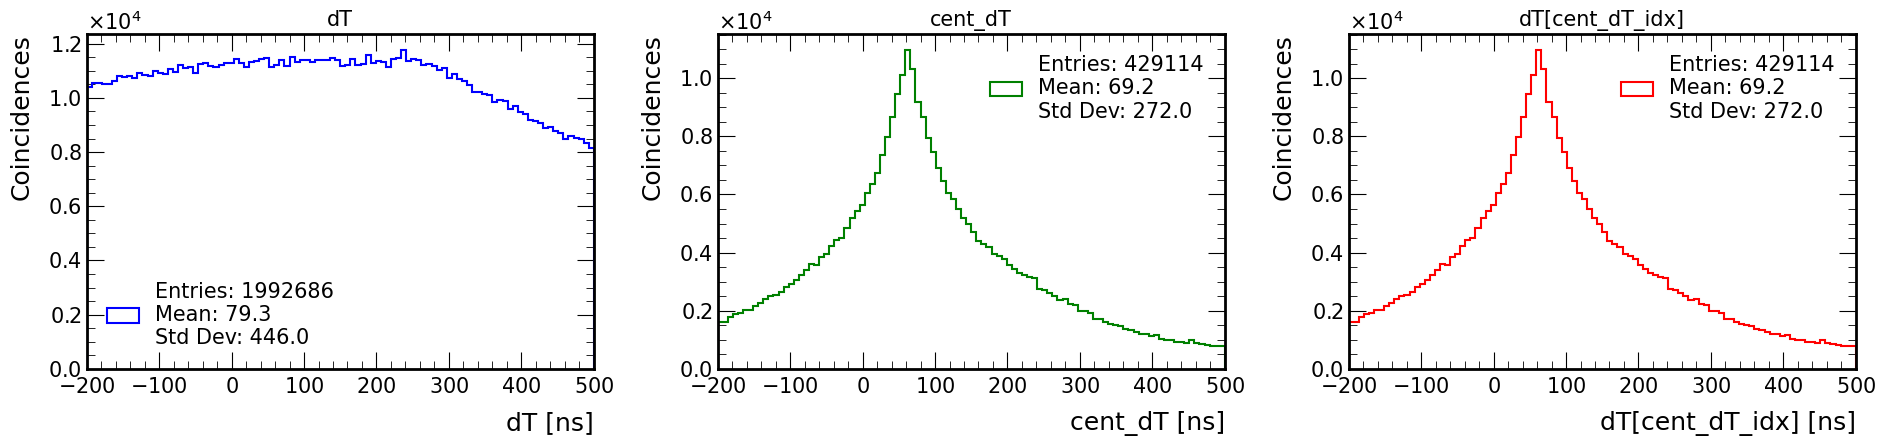

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get the dev cutset events
dev_events = events["dev"]

# Extract delta T variables
dT = ak.flatten(dev_events["dT"], axis=None)
cent_dT = ak.flatten(dev_events["cent_dT"], axis=None)
cent_dT_idx = dev_events["cent_dT_idx"]
dT_at_cent_idx = ak.flatten(dev_events["dT"][cent_dT_idx], axis=None)

# Create plotter
plotter = Plot()

# Create 1x3 plot
fig, axes = plt.subplots(1, 3, figsize=(3*6.4, 4.8))

# Plot dT
plotter.plot_1D(dT, nbins=100, xmin=-200, xmax=500, 
                col="blue", log_y=False, 
                xlabel=r"dT [ns]", ylabel="Coincidences",
                ax=axes[0], show=False)
axes[0].set_title("dT")

# Plot cent_dT
plotter.plot_1D(cent_dT, nbins=100, xmin=-200, xmax=500, 
                col="green", log_y=False, 
                xlabel=r"cent_dT [ns]", ylabel="Coincidences",
                ax=axes[1], show=False)
axes[1].set_title("cent_dT")

# Plot dT[cent_dT_idx]
plotter.plot_1D(dT_at_cent_idx, nbins=100, xmin=-200, xmax=500, 
                col="red", log_y=False, 
                xlabel=r"dT[cent_dT_idx] [ns]", ylabel="Coincidences",
                ax=axes[2], show=False)
axes[2].set_title("dT[cent_dT_idx]")

plt.tight_layout()
plt.show()

In [21]:
(150 + 25) / 2

87.5

This is correct, it's centred off from zero. 